# car model

Let's start with some basic modeling, now that we actually have some data out of the way.

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
import pandas as pd
from birdcall_distribution.geo import (
    get_shape_us_state,
    generate_grid,
    add_lonlat_columns,
    generate_grid_adjaceny_list,
    CA_EXTENT,
    get_adjacency_mapping,
    convert_to_adjacency_matrix,
)

grid_size = (0.25, 0.25)
ca_shape = get_shape_us_state("California")
grid = generate_grid(ca_shape, CA_EXTENT, grid_size)
adjacency_list = generate_grid_adjaceny_list(grid)
mapping = get_adjacency_mapping(adjacency_list)
W = convert_to_adjacency_matrix(adjacency_list)

In [98]:
from birdcall_distribution.utils import convert_time

df = pd.read_csv("../data/raw/birdclef-2022/train_metadata.csv")
df["hour"] = df.time.apply(convert_time)
df = df[["primary_label", "latitude", "longitude", "hour"]].dropna()
df = add_lonlat_columns(df, grid)
df = df[df.grid.notnull()]
df["adjacency_idx"] = df.grid_id.apply(lambda x: mapping.get(x, None))
df

,primary_label,latitude,longitude,hour,grid_id,grid,adjacency_idx
51,amewig,35.0307,-120.6205,9.500000,-120.75_35.0,"POLYGON ((-120.75 35, -120.5 35, -120.5 35.25,...",454
56,amewig,32.5640,-117.1256,9.900000,-117.25_32.5,"POLYGON ((-117.25 32.5, -117 32.5, -117 32.75,...",152
57,amewig,32.5640,-117.1256,10.250000,-117.25_32.5,"POLYGON ((-117.25 32.5, -117 32.5, -117 32.75,...",152
58,amewig,32.5640,-117.1256,10.883333,-117.25_32.5,"POLYGON ((-117.25 32.5, -117 32.5, -117 32.75,...",152
59,amewig,32.5640,-117.1256,10.750000,-117.25_32.5,"POLYGON ((-117.25 32.5, -117 32.5, -117 32.75,...",152
...,...,...,...,...,...,...,...
14652,wiltur,33.1349,-116.8522,10.850000,-117.0_33.0,"POLYGON ((-117 33, -116.75 33, -116.75 33.25, ...",136
14655,wiltur,35.2530,-120.8760,14.016667,-121.0_35.25,"POLYGON ((-121 35.25, -120.75 35.25, -120.75 3...",484
14656,wiltur,32.8706,-116.4247,5.450000,-116.5_32.75,"POLYGON ((-116.5 32.75, -116.25 32.75, -116.25...",102
14660,wiltur,38.5321,-121.0686,5.633333,-121.25_38.5,"POLYGON ((-121.25 38.5, -121 38.5, -121 38.75,...",525


In [97]:
ee_df = pd.read_parquet("../data/earth_engine.parquet")
ee_df

,name,total_pixels,elevation_mean,elevation_min,elevation_max,day_temp_mean,day_temp_min,day_temp_max,night_temp_mean,night_temp_min,...,land_cover_08,land_cover_09,land_cover_10,land_cover_11,land_cover_12,land_cover_13,land_cover_14,land_cover_15,land_cover_16,land_cover_17
0,-124.5_40.0,136,19.191799,0,603,20.218264,15.569330,23.008962,11.368067,10.211949,...,0.078431,0.039216,0.032680,0.006536,0.006536,0.006536,0.006536,0.006536,0.006536,0.686275
1,-124.5_40.25,474,149.579082,0,835,18.502147,11.282973,24.777535,9.836830,7.891062,...,0.085540,0.101833,0.030550,0.006110,0.002037,0.002037,0.002037,0.002037,0.002037,0.362525
2,-124.5_40.5,421,38.093112,-2,645,15.821732,11.407486,20.084343,8.120768,6.343226,...,0.036530,0.038813,0.084475,0.020548,0.002283,0.002283,0.002283,0.002283,0.002283,0.618721
3,-124.25_39.75,117,1.179847,0,488,15.392123,14.029692,16.968766,11.172921,10.688841,...,0.007463,0.007463,0.007463,0.007463,0.007463,0.007463,0.007463,0.007463,0.007463,0.873134
4,-124.25_40.0,511,277.559524,0,1085,19.006655,13.470183,24.122592,11.361455,9.681276,...,0.017045,0.001894,0.001894,0.018939,0.001894,0.001894,0.001894,0.001894,0.001894,0.261364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,-114.5_34.0,642,196.793367,98,607,38.105495,31.176378,42.030295,17.193113,14.073062,...,0.001517,0.003035,0.033384,0.001517,0.153263,0.010622,0.001517,0.001517,0.593323,0.001517
767,-114.5_34.25,622,405.715608,136,1099,35.530803,21.568142,41.116534,18.896735,16.326429,...,0.001565,0.001565,0.028169,0.001565,0.001565,0.046948,0.001565,0.001565,0.593114,0.034429
768,-114.5_34.5,604,335.788265,136,1018,36.509852,25.131747,40.549440,18.795195,16.373301,...,0.001610,0.001610,0.032206,0.001610,0.001610,0.014493,0.001610,0.001610,0.487923,0.006441
769,-114.25_34.0,645,299.934949,117,658,39.580588,35.338905,42.290031,18.505028,16.028932,...,0.001511,0.001511,0.051360,0.001511,0.001511,0.006042,0.001511,0.001511,0.583082,0.001511


Now let's build our first model. We will create a logistic regression with CAR without any exogenous terms.
Our exogneous factors include landcover (which we will attempt to model as a categorical prior), temperature, and elevation.

In [32]:
# create counts for each adjacency index
import numpy as np
import pymc as pm
import arviz as az

In [130]:
# count number of observed calls per adjacency index, and join against the ee variables

counts_df = df.grid_id.value_counts().reset_index()
counts_df.columns = ["grid_id", "y"]
prep_df = counts_df.merge(
    ee_df.rename(columns={"name": "grid_id"}), on="grid_id", how="outer"
)
prep_df["adjacency_idx"] = prep_df.grid_id.apply(lambda x: mapping.get(x, None))
prep_df = prep_df.set_index("adjacency_idx").sort_index()
prep_df

,grid_id,y,total_pixels,elevation_mean,elevation_min,elevation_max,day_temp_mean,day_temp_min,day_temp_max,night_temp_mean,...,land_cover_08,land_cover_09,land_cover_10,land_cover_11,land_cover_12,land_cover_13,land_cover_14,land_cover_15,land_cover_16,land_cover_17
adjacency_idx,,,,,,,,,,,,,,,,,,,,,
0,-114.25_34.0,NaN,645,299.934949,117,658,39.580588,35.338905,42.290031,18.505028,...,0.001511,0.001511,0.051360,0.001511,0.001511,0.006042,0.001511,0.001511,0.583082,0.001511
1,-114.25_34.25,11.0,642,400.443122,125,814,36.477926,26.039213,39.694527,19.026086,...,0.001517,0.001517,0.091047,0.001517,0.001517,0.004552,0.001517,0.001517,0.107739,0.010622
2,-114.5_32.75,4.0,652,129.812169,42,388,37.743856,28.135905,41.715545,18.323080,...,0.001495,0.007474,0.095665,0.004484,0.029895,0.010463,0.001495,0.001495,0.657698,0.005979
3,-114.5_33.5,NaN,649,281.244898,83,741,37.156411,31.041839,41.692120,18.296156,...,0.001502,0.001502,0.015015,0.001502,0.016517,0.001502,0.001502,0.001502,0.834835,0.001502
4,-114.5_33.75,1.0,646,168.725765,88,386,37.222819,31.051061,41.779436,16.969324,...,0.001508,0.001508,0.021116,0.001508,0.315234,0.001508,0.001508,0.001508,0.559578,0.001508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,-124.25_41.75,NaN,579,207.669643,-3,774,17.244983,11.934333,21.336143,9.212537,...,0.033557,0.008389,0.036913,0.001678,0.006711,0.016779,0.001678,0.001678,0.001678,0.167785
767,-124.25_42.0,NaN,557,390.306122,0,1046,19.899230,15.922079,25.720772,10.425783,...,0.012195,0.006969,0.003484,0.001742,0.001742,0.003484,0.001742,0.001742,0.001742,0.012195
768,-124.5_40.0,NaN,136,19.191799,0,603,20.218264,15.569330,23.008962,11.368067,...,0.078431,0.039216,0.032680,0.006536,0.006536,0.006536,0.006536,0.006536,0.006536,0.686275


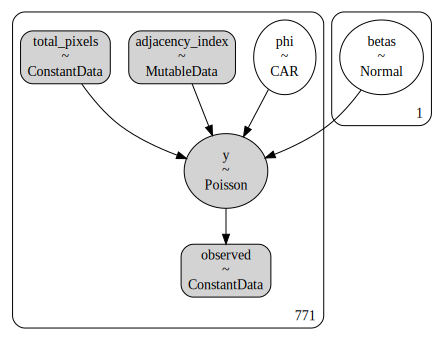

In [152]:
with pm.Model() as simple_model:
    # create a masked array with observed counts
    observed = pm.ConstantData(
        "observed", np.ma.masked_array(prep_df.y.values, mask=prep_df.y.isna())
    )
    adjacency_index = pm.MutableData("adjacency_index", prep_df.index.values)
    total_pixels = pm.ConstantData("total_pixels", prep_df.total_pixels.values)

    # spatial adjustments
    phi = pm.CAR("phi", mu=np.zeros(W.shape[0]), tau=1e-5, alpha=0.5, W=W)
    # we should constrain the ince
    betas = pm.Normal("betas", mu=0, tau=1e-5, shape=1)

    pm.Poisson(
        "y",
        mu=pm.math.exp(betas[0] + phi[adjacency_index] + pm.math.log(total_pixels)),
        observed=observed,
    )

# draw the model via graphviz
pm.model_to_graphviz(simple_model)

In [154]:
with simple_model:
    trace = pm.sample(1000, tune=500, cores=8)

print(y.mean())
az.plot_trace(trace)
az.summary(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


SamplingError: Initial evaluation of model at starting point failed!
Starting values:
{'phi': array([-4.22653824e-01, -8.37481617e-01, -4.97607327e-01, -6.52392904e-01,
       -3.85247114e-01,  6.29558356e-01,  6.53986521e-01, -2.70272473e-01,
       -6.52771618e-02,  8.09961708e-01, -7.45045381e-01,  3.31682038e-01,
       -1.41248495e-02, -1.76957616e-01,  3.22981186e-01,  4.63255877e-02,
       -6.46525516e-01, -3.18291568e-01, -1.44319849e-01,  5.02399633e-01,
       -9.96956859e-01, -5.43807627e-01,  6.57772716e-02,  4.63690187e-01,
       -1.21926354e-01,  2.93215451e-01, -2.99222175e-01, -4.86905567e-01,
       -2.09553003e-01,  2.66164207e-01, -2.98525379e-01, -8.39261832e-01,
       -5.20273612e-01, -9.79671362e-01,  3.25851963e-01, -3.08456796e-01,
       -3.00212051e-01,  1.11505305e-01, -1.32815432e-01, -8.50627607e-01,
        9.02687211e-01,  9.15643921e-01,  1.53639396e-01,  7.29198575e-01,
       -5.92035604e-01,  3.19685136e-01, -4.81008713e-01, -8.22053286e-01,
        1.02131308e-02, -1.52944717e-01, -6.08527606e-01,  7.21272249e-01,
       -1.13762305e-01,  5.90055921e-01, -5.65027601e-01,  6.78714542e-01,
       -7.29405864e-01,  6.09613859e-01, -5.63936814e-01, -7.99622969e-01,
       -6.86981092e-01, -8.95749713e-01, -1.15771291e-01, -8.77133557e-01,
        1.54926671e-01,  7.73365305e-01,  3.31350595e-01,  3.52939387e-01,
        6.38989353e-01,  2.42618707e-01, -3.36144380e-01, -6.79334087e-01,
        1.83571395e-01,  4.40093757e-01,  2.76860566e-01, -3.35682088e-01,
       -2.12372541e-01, -9.69356519e-02,  6.60817597e-01,  6.59880810e-02,
       -4.88617492e-01, -4.01477072e-01, -4.42660888e-01,  5.14535716e-01,
        4.51035842e-01,  7.95282381e-01,  6.96942629e-01, -5.01013664e-02,
       -5.19074527e-01,  5.77168960e-02,  9.67158967e-01,  8.39421786e-01,
       -6.12086728e-01,  2.61539697e-01, -6.71379962e-01,  2.85770926e-01,
        9.45301576e-01, -4.50445243e-02,  1.21466705e-01, -3.58447781e-01,
        8.54351679e-01, -8.77794897e-01,  5.37558379e-01,  2.48483602e-01,
        9.31749248e-01,  4.34327295e-01, -6.81050057e-01,  4.42177651e-01,
       -2.13255511e-01,  9.73944636e-02, -8.08176949e-01, -9.50987172e-01,
        9.66291865e-01, -1.97086541e-02, -9.92818622e-01, -1.72974842e-01,
        7.52406886e-01, -2.73005168e-01, -1.53881327e-01, -7.32343081e-01,
       -3.70103607e-01,  9.95370994e-01,  8.89489097e-01, -8.13091598e-01,
        9.78826948e-01, -4.96155510e-01, -9.95944831e-01,  4.34674988e-01,
        9.66577239e-01, -9.57157218e-01, -7.85777682e-01, -3.24337954e-01,
        7.23583279e-01,  1.63314194e-01,  9.28799309e-01, -7.05193080e-01,
        6.75299028e-01, -8.43312634e-01, -7.48952119e-01, -3.25308287e-01,
        9.15106975e-01,  4.18213170e-01, -4.40124974e-01, -9.04318103e-01,
        4.02404651e-01, -3.38248211e-02,  8.91014795e-01, -7.89171589e-01,
       -1.33932599e-01, -9.60599481e-01, -4.34908469e-01,  6.76178789e-01,
        5.29749469e-01, -9.19259401e-01,  8.51369101e-01,  4.48310051e-01,
        7.88229907e-01,  8.18144937e-01,  8.09348013e-02,  8.37076003e-01,
        9.56420568e-01,  3.21780522e-01, -2.57003263e-01, -5.18464108e-01,
       -1.72508601e-02, -9.51583718e-01, -7.65350835e-01,  5.24903057e-01,
        8.00043150e-01,  4.31186186e-01,  1.12733023e-01,  7.75141672e-01,
       -1.08717316e-01,  6.56756709e-01,  3.71253844e-01,  9.18145894e-01,
        9.96356063e-01,  4.58775843e-01,  7.52160503e-01, -7.25179340e-01,
       -8.65812293e-01, -4.34891160e-01, -4.67090517e-01,  7.19957716e-01,
       -1.34656315e-02,  4.12386071e-01, -6.64276468e-01,  6.68525746e-01,
        2.33884260e-01,  3.14340578e-01,  4.02645430e-01, -8.10951465e-01,
       -8.34462019e-01,  3.92415529e-01,  6.31272523e-01, -6.91823841e-01,
       -3.71043928e-01,  3.62933491e-01, -2.69665751e-01,  6.30228916e-01,
        4.86154349e-01, -5.10888188e-01,  8.37485020e-01,  2.74565896e-01,
        5.09635760e-02, -9.08526119e-01, -7.56778770e-01,  8.49546520e-01,
        2.24079795e-01,  7.45413236e-01, -3.87608661e-02,  9.18700523e-01,
        3.22761300e-02, -7.62215892e-01, -4.86992327e-01, -8.22742186e-01,
       -1.73589559e-01,  7.48364939e-01,  7.71607287e-01, -2.83965347e-01,
       -3.50727257e-01, -6.54775296e-02,  8.97014557e-01,  4.00807749e-01,
        2.71100726e-01,  9.30909198e-01, -6.24512229e-01,  9.51809746e-01,
       -8.59092548e-01, -9.52811892e-01,  1.62938033e-01,  6.41587309e-01,
        2.72647255e-01,  2.43593376e-01, -9.24924113e-01, -3.50774189e-01,
        9.17526127e-03, -9.74038304e-01, -7.30159553e-01,  7.75246356e-01,
       -3.18278131e-01,  6.72227441e-02,  6.56349964e-01,  7.05562129e-02,
        7.99509863e-01,  5.53226389e-01,  4.57085768e-01,  2.96683721e-01,
       -8.11476595e-01,  5.56202883e-01,  7.89514603e-01, -4.61809144e-01,
        1.88237271e-01,  9.48642940e-01,  1.51744901e-01, -6.76065239e-01,
       -8.34933275e-01, -6.71622701e-01,  6.40852580e-02,  6.29306679e-02,
        5.24780355e-01,  8.97056547e-01, -7.78201803e-02, -4.78789977e-01,
       -6.33798062e-01, -7.30461733e-01, -7.56017999e-01,  8.39187010e-01,
        7.62636165e-01,  8.42794879e-01,  6.20383331e-01, -5.36233634e-01,
        5.55616354e-01, -8.31981072e-01, -3.02718974e-01,  4.39688954e-01,
       -7.74080939e-01,  3.50991133e-02,  9.93154088e-02, -3.23686502e-03,
        8.65281690e-01, -3.40176073e-01, -2.53615965e-01, -9.11352458e-01,
       -2.99335927e-01,  1.60935984e-01,  4.07601140e-01,  4.82356077e-01,
       -7.62184548e-01, -5.75490068e-01,  9.95457158e-01,  1.06741198e-01,
        6.27737881e-02, -9.38799825e-01, -5.29113975e-01,  2.02750103e-01,
        5.02611944e-01, -3.49285733e-01,  6.41306087e-01,  1.45618008e-01,
       -5.21950971e-01,  4.81855593e-01, -9.62795757e-01, -4.38327223e-01,
        9.63001327e-01,  1.14112884e-01, -9.63551199e-01, -8.38966832e-02,
       -4.00228141e-01, -7.51307161e-01,  8.63248363e-01,  5.56086423e-01,
       -5.75070266e-01, -2.20657712e-01,  3.86230293e-02,  8.74958151e-01,
       -5.67995960e-01, -5.32556553e-01,  3.46866581e-01,  7.70076312e-01,
        2.08917026e-01, -7.57301424e-01, -8.77053784e-01, -2.90941478e-01,
       -7.90165607e-01,  3.38657604e-01, -8.64119715e-01,  5.08916692e-01,
       -6.70850930e-01, -9.11096731e-01,  7.08840280e-01,  6.78949482e-02,
       -9.77298447e-01,  5.31485974e-01,  6.17341723e-01,  1.76862399e-01,
       -5.42267198e-01,  8.92681086e-01,  7.85416582e-01, -1.27837139e-01,
        5.09699741e-01, -7.10001249e-02, -8.43626623e-01, -5.24101139e-01,
        1.32382098e-02, -5.93663160e-01,  4.64250316e-03, -7.63693419e-01,
       -4.31189345e-01,  3.46379663e-01,  7.10805666e-01,  1.92595316e-01,
        8.05563363e-01,  2.23912976e-01,  5.18996394e-01,  6.74948563e-01,
       -3.56590335e-01, -8.42576671e-01,  4.83019227e-02, -1.52346904e-01,
       -8.85635742e-01,  1.32287607e-02, -1.48926418e-01, -3.23505124e-01,
        7.68863850e-01, -6.05303679e-01, -2.96583251e-01, -8.97438514e-01,
       -4.21009557e-01,  1.14505630e-01, -2.62692299e-02,  7.83179838e-01,
        3.78748831e-01, -4.94394683e-02,  3.43436766e-01, -6.59397285e-01,
       -8.96902358e-02, -8.58092848e-01,  5.78640843e-01,  1.26602940e-01,
        8.82934953e-01, -7.02933443e-02, -7.86758758e-01, -9.81785882e-01,
        7.50623760e-01,  6.99541739e-01,  9.73359253e-01,  8.09853872e-01,
        6.50702463e-01,  6.13433827e-01,  9.76932876e-01, -6.10568345e-03,
       -5.53936630e-01, -5.01940619e-01,  9.25286397e-01, -8.91488562e-01,
       -9.78854196e-01, -8.50199589e-01,  4.10679529e-01, -5.03386593e-01,
        5.98288883e-01,  6.36378111e-02,  4.64488575e-01, -3.69024369e-01,
        3.83340705e-01,  8.35465876e-03, -5.09786811e-01, -3.75478948e-01,
       -7.45927864e-01,  7.53974436e-02,  3.72971521e-01, -4.76175785e-02,
        2.40572927e-01,  4.84990848e-01,  6.49922884e-01,  9.17899858e-02,
        8.49070194e-01, -7.67895884e-01, -7.06081296e-01, -2.63647208e-01,
        5.86088084e-01,  1.01510210e-01,  3.01705349e-01, -5.45806997e-01,
       -3.80867314e-01, -7.55484319e-01,  4.84595269e-01,  4.14025464e-01,
       -2.83891668e-01, -5.29325311e-01, -1.30529545e-01,  8.31693588e-01,
        2.69944828e-01,  3.31913089e-01,  6.04951730e-01,  8.10024599e-01,
       -9.98009256e-01, -1.31184830e-01, -2.20690289e-01,  8.46893261e-01,
        9.48617011e-01, -8.74370234e-01,  5.69285607e-01, -6.92723416e-01,
        8.73845634e-02,  8.65484192e-01, -9.43406191e-01, -2.00401985e-02,
       -6.17706616e-03, -2.32240866e-01,  5.58057994e-02, -1.13656755e-01,
       -8.98787357e-02, -1.82327748e-02,  5.64975292e-01,  8.20877809e-01,
        3.16547456e-01,  7.65918558e-01,  6.65392267e-01, -1.46876613e-01,
       -1.74960144e-02,  3.71510939e-01, -9.65373686e-01, -4.88352171e-01,
        7.71371050e-01,  5.91804646e-01, -2.29241184e-01,  9.78761545e-02,
        8.57715339e-01, -1.53274152e-01, -7.42091685e-01,  7.94302090e-01,
       -6.25953337e-01, -9.79660969e-01,  3.60621859e-01,  5.64338139e-01,
        9.08041090e-01, -9.28912518e-01, -4.00786580e-01,  7.27201511e-01,
       -4.47117209e-01,  9.79335761e-01, -8.60929591e-02,  6.83229161e-01,
       -2.29233450e-01,  4.81232859e-02,  9.38608466e-01, -2.86561548e-01,
        1.77193923e-01, -5.82696057e-02,  2.78934555e-01,  9.43243037e-01,
       -7.35622548e-02, -3.27233115e-01, -8.11150771e-01,  7.38031290e-01,
       -6.43062106e-01, -3.48211432e-04, -6.87546622e-01, -1.78295563e-01,
       -8.36411160e-01, -6.32280934e-01, -1.26101859e-01, -7.81859577e-01,
        9.01042039e-01,  7.68387652e-01, -4.79389874e-01, -3.66699076e-02,
       -7.95045276e-01, -4.10513141e-01, -9.32318650e-02, -8.06008791e-01,
        6.17749860e-01, -9.68902015e-01,  8.08865817e-01,  5.79297227e-01,
        4.05432777e-01, -8.77153033e-01, -1.46617320e-01,  3.84714183e-01,
       -2.63104122e-01,  8.71983624e-01,  4.77711737e-01, -9.87173888e-01,
       -4.00194741e-01,  7.71723567e-01,  1.66466681e-01, -7.39894545e-01,
       -2.99021710e-01,  8.10560558e-01,  8.78100699e-01,  7.49524932e-01,
       -3.08261842e-01, -2.34516587e-01, -7.95408624e-01, -7.46486738e-02,
       -3.74656471e-01,  7.94533854e-01,  2.35953636e-01,  6.29287004e-02,
       -2.31036047e-01, -6.39323757e-01,  6.60020674e-01, -7.11622041e-01,
        6.73289034e-02,  5.24354747e-01,  9.37967956e-01, -4.05031204e-01,
        2.32497287e-01, -6.47079888e-01, -2.06078759e-02, -3.21129454e-01,
       -2.00401688e-01, -7.38222019e-01, -8.62359184e-01,  7.16307266e-01,
       -9.82207341e-02,  3.26336058e-01, -1.46512336e-01,  7.83720097e-01,
        9.73425507e-01, -4.71150506e-01, -5.85675949e-01, -5.16786554e-02,
        1.08821366e-01, -4.78410030e-01,  2.72625424e-01, -5.67396956e-02,
       -1.33096389e-01, -7.47199010e-01, -5.78680682e-01, -4.77623170e-02,
       -4.03154475e-01, -5.75256373e-01, -5.06304404e-01,  2.23714122e-01,
        2.32330032e-01,  3.11711301e-01, -9.99025048e-01,  1.13654044e-01,
        6.54492168e-01,  7.74428303e-01,  2.48698998e-01, -2.39907269e-01,
        4.88382192e-01, -4.42128373e-01,  6.37868628e-01,  9.56379550e-01,
        3.10507343e-01,  7.54752694e-01, -1.02675311e-02,  7.91857644e-01,
        4.30255043e-01, -1.31263206e-01,  1.44962370e-01, -5.00638247e-01,
       -9.32995869e-01,  2.87761731e-01,  5.76433914e-01, -3.28776150e-01,
       -4.37341954e-01, -7.12771627e-01, -3.46889860e-01, -7.33567478e-02,
       -7.93334054e-01, -4.34777842e-01,  4.21891232e-01,  9.67045885e-01,
       -1.17005836e-01, -4.06263458e-01,  4.76657936e-01,  5.22877385e-01,
        2.29796758e-01,  5.38256623e-01, -9.34055112e-01,  9.67830985e-01,
        6.47471882e-01, -7.39574149e-01, -5.69825219e-01, -5.84049621e-02,
        9.81671306e-01, -1.28201492e-01, -6.51863228e-01, -8.55817621e-01,
        4.98925775e-02, -7.93007588e-01, -3.82621507e-02,  3.67833421e-01,
        2.96253385e-01, -1.06566395e-02,  8.19608294e-01,  5.22169519e-01,
       -5.59535255e-01, -4.79189987e-01,  1.76376053e-01,  7.96122350e-01,
       -7.97427046e-01, -2.95559749e-01, -4.44240205e-01,  6.14347603e-01,
       -9.09737575e-02,  3.29815019e-01,  9.21604033e-01,  8.13665595e-01,
        1.52561233e-01, -7.16096885e-01,  6.61167984e-01, -9.26313313e-01,
       -7.95489703e-01,  3.86342091e-01, -3.85657401e-01,  7.29977028e-01,
       -5.10770892e-01, -4.13644273e-01, -3.13183800e-01, -1.80313981e-01,
       -5.36345944e-02,  9.16062787e-01, -2.63706527e-01, -4.40213994e-01,
       -2.41675755e-01,  2.62645209e-01, -5.98946300e-01,  8.23121126e-02,
        1.51613060e-01,  2.30190257e-01,  2.30893157e-01,  7.75627804e-02,
        3.76718908e-01, -6.77924607e-01, -8.81791821e-01, -4.33578389e-02,
        9.79541032e-03, -6.66949658e-01, -6.77090383e-01, -1.00987373e-01,
       -8.64395618e-01, -3.27550393e-01,  7.70091570e-01,  7.93280251e-01,
       -2.13459256e-02, -1.93501272e-01, -6.72279111e-01, -8.18711693e-01,
        2.13594803e-01,  8.07386962e-01,  7.15460919e-01,  9.98703034e-01,
       -9.73991715e-01,  5.19213217e-01,  3.85508482e-02, -5.43745444e-01,
       -4.16623893e-02,  7.73397745e-01,  1.52215486e-01,  5.01654573e-01,
       -6.33958607e-01, -4.78562707e-01, -8.44290758e-01,  4.07730310e-01,
        5.67353015e-01,  7.13011831e-01, -3.63040720e-01, -8.63707782e-01,
        9.37379742e-01,  8.92026520e-01,  6.72503889e-01,  7.40270304e-01,
       -4.55557481e-01, -8.79745044e-01,  1.31922876e-01,  7.45050124e-01,
       -6.92834503e-01,  3.77097078e-01, -3.55046552e-01, -2.16424788e-01,
        5.02681352e-01, -3.36843538e-01,  4.42289990e-02, -8.21212701e-02,
       -8.61692366e-02, -3.28377477e-02,  3.46429939e-01, -8.10622186e-01,
       -6.73699237e-01,  1.28722584e-01, -5.48719055e-01,  4.35950109e-01,
       -4.50308745e-01, -6.21376741e-01, -8.57326397e-01,  4.72789908e-01,
        5.11554985e-01, -4.88893924e-02, -9.53623334e-03, -4.15955810e-01,
       -6.86978578e-01, -4.35984816e-01, -4.81403913e-01, -3.14344598e-01,
       -7.38856586e-01,  1.80620942e-01,  5.88075821e-01, -1.58333137e-01,
        3.07007632e-01, -4.90003981e-01, -5.71209297e-01, -7.20604651e-01,
       -5.85960742e-02,  1.85129119e-02,  7.57079780e-01, -8.74445718e-01,
        4.29490705e-01,  9.29334229e-01,  1.62586599e-01,  4.98829269e-01,
        2.56536138e-01, -1.67016713e-02,  9.15762016e-01,  8.40818186e-01,
       -8.95826799e-01,  5.18685432e-01, -1.31389021e-01, -4.07874302e-01,
        8.63630362e-01, -7.33251473e-01,  8.90668479e-01,  4.71984729e-01,
       -7.35122450e-01, -6.35005652e-01,  5.96469469e-01]), 'betas': array([-0.29264932])}

Initial evaluation results:
{'phi': -4446.29, 'betas': -6.68, 'y': -inf}